In [1]:
from SVM import SVM
from MLP import MLP
from OnlineHD_model import OnlineHD
from OnlineHDv1 import OnlineHDv1
from OnlineHDv2 import OnlineHDv2
from NeuralHDv1 import NeuralHDv1
from NeuralHDv2 import NeuralHDv2
from testcode import NeuralHDSpecial
from OnlineHD_model import OnlineHD
from BIC import NeuralHDBIC
from flexHD import NeuralHDDev
import time
import numpy as np
import torch
import matplotlib.pyplot as plt

In [2]:
path="../../../Data/malware-classification/"
with open(path+'data11.npy', 'rb') as f:
    transxtrain=np.load(f)
    transx_test=np.load(f)
    transytrain=np.load(f)
    transy_test=np.load(f)
xtr=torch.from_numpy(transxtrain).float()
xte=torch.from_numpy(transx_test).float()
ytr=torch.from_numpy(transytrain).long()
yte=torch.from_numpy(transy_test).long()

In [ ]:
#General notes:
#Try outputting arrays containing accuracy for each hyperparameter setting on your report.
#That way, you will be able to easily paste the results into the excel spreadsheet.

#Tine tuning parameters one by one using a for loop is prone to local minima.
#The order in which the parameters tuned determines which local minimum is found.
#Try running fine tuning multiple times starting with tuning a different parameter each time.
#For example, last time you started with learning rate, so maybe start with another such as epochs
# or dropout rate.
#Try using initial static hyperparameters from my code, and also separately trying initial static
#hyperparameters from the fine-tuning you already did once.

In [ ]:
#MLP
#Compare my version to best version from your analysis (they look extremely similar in accuracy,
#around 96.) Since parameters are quite different, this is evidence of local minima.
#Hyperparameter fine tuning method is not perfect - possibility that neither of these is the best
#Try rerunning the fine tuning starting with mine, and also with yours. 
#See if you can find hyperparameters that give better accuracy than 96.1
#Report: Better hyperparameters and their resulting accuracy


In [131]:
model=MLP(classes =9, features=257, dim = 1024)#1-24
#training
start=time.time()
model.fit(transxtrain,transytrain,64,64,.003)
end=time.time()
training=end-start
#inference
start=time.time()
yhat=model(transx_test)
end=time.time()
inference=end-start
eval=[yhat[i]==transy_test[i] for i in range(len(transy_test))]
acc=sum(eval)/len(transy_test)
acc

(8151, 257) (8151, 9)


0.9609863820390137

In [ ]:
#Hyperdimensional Computing Functions (OnlineHD, NeuralHD, NeuralHDSpecial exotic functions such
# as BIC and SingleStop)
#Note about batch size:
#Treat batch size as a special parameter - if you run it at batch size close to 1, results will
# be better, but it will take forever. 
# Fine tune all the other parameters with batch size 64, and only after all fine tuning is done 
# check how accuracy is if you lower batch size. This way, batch size doesn't slow down tuning
# of the other parameters.

# Make sure to try dropout=0 and regens=0 for NeuralHD

In [ ]:
#"Original" Functions
#OnlineHDv1 and NeuralHDv1
#Try the same tuning strategy as MLP. In addition to the initial parameters below, consider the
#optimal parameters you found for OnlineHD and NeuralHD with train1 function
#Report: Better hyperparameters and their resulting accuracy

In [ ]:
#OnlineHdv1
model=OnlineHDv1(classes =9, features =257, dim = 2048, batch_size=64,lr=.0003)
print("training")
start=time.time()
model.fit(xtr,ytr,75)
end=time.time()
print(end-start)
print("inference")
start=time.time()
yhat=model(xte)
end=time.time()
print(end-start)
eval=[yhat[i]==transy_test[i] for i in range(len(transy_test))]
acc=sum(eval)/len(transy_test)
acc

In [ ]:
model=NeuralHDv1(classes =9, features =257, dim = 2048, batch_size=64,lr=.0001)
print("training")
start=time.time()
model.fit(xtr,ytr,35,4,.1)
end=time.time()
print(end-start)
print("inference")
start=time.time()
yhat=model(xte)
end=time.time()
print(end-start)
eval=[yhat[i]==transy_test[i] for i in range(len(transy_test))]
acc=sum(eval)/len(transy_test)
acc

In [ ]:
#"Improved" Functions
#OnlineHDv2 and NeuralHDv2
#Try the tuning. In addition to the initial parameters below, consider the
#optimal parameters you found for OnlineHD and NeuralHD with train3 function
#Report: Better hyperparameters and their resulting accuracy

In [ ]:
model=OnlineHDv2(classes =9, features =257, dim = 2048, batch_size=64,lr=.0001)
print("training")
start=time.time()
model.fit(xtr,ytr,75)
end=time.time()
print(end-start)
print("inference")
start=time.time()
yhat=model(xte)
end=time.time()
print(end-start)
eval=[yhat[i]==transy_test[i] for i in range(len(transy_test))]
acc=sum(eval)/len(transy_test)
acc

In [6]:
model=NeuralHDv2(classes =9, features =257, dim = 2048, batch_size=64,lr=.0001, multiencoder=False)
print("training")
start=time.time()
model.fit(xtr,ytr,35,5,.1)
end=time.time()
print(end-start)
print("inference")
start=time.time()
yhat=model(xte)
end=time.time()
print(end-start)
eval=[yhat[i]==transy_test[i] for i in range(len(transy_test))]
acc=sum(eval)/len(transy_test)
acc

training
25.831881046295166
inference
0.043576955795288086


tensor(0.9536)

In [7]:
#"Experimental" Functions
#NeuralHDSpecial BIC=True, "SingleStop"
#Try the tuning. See if the same parameters that are good for NeuralHDv2 normal are also good
#for BIC version, and figure out if optimal BIC version has better accuracy than optimal 
#Report: hyperparameters, accuracy, and is it better than NeuralHDv2?

In [8]:
model=NeuralHDSpecial(9,257,2048,batch_size=64,trainopt=2,bestinclass=True,lr=.0001)
print("training")
start=time.time()
model.fit(xtr,ytr,35,6,.1)
end=time.time()
print(end-start)
print("inference")
start=time.time()
yhat=model(xte)
end=time.time()
print(end-start)
eval=[yhat[i]==transy_test[i] for i in range(len(transy_test))]
acc=sum(eval)/len(transy_test)
acc

test
training


/Users/bobbymissirian/Files/Research/Cybersecurity/Experiments/testcode.py:62: UserWarning: An output with one or more elements was resized since it had shape [257, 2048], which does not match the required output shape [184, 2048].This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at  ../aten/src/ATen/native/Resize.cpp:23.)
  torch.matmul(x[i:i+bsize], self.basis.T, out=temp)


24.650975942611694
inference
0.043467044830322266


/Users/bobbymissirian/Files/Research/Cybersecurity/Experiments/testcode.py:62: UserWarning: An output with one or more elements was resized since it had shape [257, 2048], which does not match the required output shape [147, 2048].This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at  ../aten/src/ATen/native/Resize.cpp:23.)
  torch.matmul(x[i:i+bsize], self.basis.T, out=temp)


tensor(0.9584)

In [9]:
# A "Single Stop" is when you run model.fit normally, but when it stops, you run another model
# of batch size 1. For some reason, this works only when you don't use have a regen in the first
# fit.
# Feel free to experiment with this strange effect.

In [121]:
model=NeuralHDDev(9,257,1024,trainopt=2,bestinclass=True, multiencoder=True)
models=model.fit(xtr,ytr,64,0,0,.0001,64,1)#Initial training
models=model.fit(xtr,ytr,6,1,0,.0001,1,1)#Initial training
yhat=model(xte)
eval=[yhat[i]==transy_test[i] for i in range(len(transy_test))]
ekans=sum(eval)/len(transy_test)
ekans

test
0.0001
64


/Users/bobbymissirian/Files/Research/Cybersecurity/Experiments/flexHD.py:61: UserWarning: An output with one or more elements was resized since it had shape [257, 1024], which does not match the required output shape [184, 1024].This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at  ../aten/src/ATen/native/Resize.cpp:23.)
  torch.matmul(x[i:i+bsize], self.basis.T, out=temp)


0.0001
1


/Users/bobbymissirian/Files/Research/Cybersecurity/Experiments/flexHD.py:61: UserWarning: An output with one or more elements was resized since it had shape [257, 1024], which does not match the required output shape [147, 1024].This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at  ../aten/src/ATen/native/Resize.cpp:23.)
  torch.matmul(x[i:i+bsize], self.basis.T, out=temp)


tensor(0.9595)

In [118]:
accs=[]
for i in range(10):
    model=NeuralHDDev(9,257,2048,trainopt=2,bestinclass=True, multiencoder=True)
    model.basis=torch.load("StitchHD/basis.pt")
    models=model.fit(xtr[:int(1*len(xtr))],ytr[:int(1*len(xtr))],64,30,0,.0001,64,1)#Initial training
    yhat=model(xte)
    eval=[yhat[i]==transy_test[i] for i in range(len(transy_test))]
    ekans=sum(eval)/len(transy_test)
    accs.append(ekans)

test
0.0001
64


/Users/bobbymissirian/Files/Research/Cybersecurity/Experiments/flexHD.py:61: UserWarning: An output with one or more elements was resized since it had shape [257, 2048], which does not match the required output shape [184, 2048].This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at  ../aten/src/ATen/native/Resize.cpp:23.)
  torch.matmul(x[i:i+bsize], self.basis.T, out=temp)
/Users/bobbymissirian/Files/Research/Cybersecurity/Experiments/flexHD.py:61: UserWarning: An output with one or more elements was resized since it had shape [257, 2048], which does not match the required output shape [147, 2048].This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero eleme

test
0.0001
64
test
0.0001
64
test
0.0001
64
test
0.0001
64
test
0.0001
64
test
0.0001
64
test
0.0001
64
test
0.0001
64
test
0.0001
64


In [119]:
accs

[tensor(0.9687),
 tensor(0.9672),
 tensor(0.9706),
 tensor(0.9706),
 tensor(0.9698),
 tensor(0.9695),
 tensor(0.9739),
 tensor(0.9695),
 tensor(0.9709),
 tensor(0.9698)]

In [120]:
np.median(accs)

0.96981966

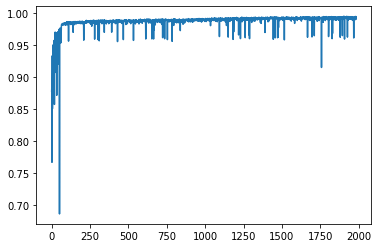

In [97]:
model.plot()

/Users/bobbymissirian/Files/Research/Cybersecurity/Experiments/flexHD.py:61: UserWarning: An output with one or more elements was resized since it had shape [257, 2048], which does not match the required output shape [147, 2048].This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at  ../aten/src/ATen/native/Resize.cpp:23.)
  torch.matmul(x[i:i+bsize], self.basis.T, out=temp)


tensor(0.9687)

In [48]:
copies=[88,89,90,91,92,93,94,95,96,97,98,99,100]
beforeaccs=[]
start=time.time()
model=NeuralHDDev(9,257,2048,trainopt=2,bestinclass=True, multiencoder=True)
models=model.fit(xtr,ytr,50,1,0,.0001,1,1,copies)#Initial training
afteraccs=[]
for model in models:
    yhat=model(xtr)
    eval=[yhat[i]==transytrain[i] for i in range(len(transytrain))]
    beforeaccs.append(sum(eval)/len(transytrain))
    model.fit(xtr,ytr,6,1,0,.0001,1,1)
    yhat=model(xte)
    eval=[yhat[i]==transy_test[i] for i in range(len(transy_test))]
    afteraccs.append(sum(eval)/len(transy_test))

test
0.0001
1
0.0001
1
0.0001
1
0.0001
1
0.0001
1
0.0001
1
0.0001
1
0.0001
1
0.0001
1
0.0001
1
0.0001
1
0.0001
1
0.0001
1
0.0001
1


In [49]:
beforeaccs

[tensor(0.9872),
 tensor(0.9875),
 tensor(0.9863),
 tensor(0.9817),
 tensor(0.9870),
 tensor(0.9864),
 tensor(0.9859),
 tensor(0.9861),
 tensor(0.9837),
 tensor(0.9836),
 tensor(0.9871),
 tensor(0.9854),
 tensor(0.9863)]

In [50]:
afteraccs

[tensor(0.9617),
 tensor(0.9643),
 tensor(0.9639),
 tensor(0.9639),
 tensor(0.9636),
 tensor(0.9636),
 tensor(0.9628),
 tensor(0.9632),
 tensor(0.9639),
 tensor(0.9628),
 tensor(0.9639),
 tensor(0.9647),
 tensor(0.9632)]

In [20]:
accs

[tensor(0.9628),
 tensor(0.9603),
 tensor(0.9610),
 tensor(0.9643),
 tensor(0.9639),
 tensor(0.9621),
 tensor(0.9610),
 tensor(0.9625),
 tensor(0.9628),
 tensor(0.9588),
 tensor(0.9636),
 tensor(0.9603),
 tensor(0.9625)]

In [132]:
copies=[38,39,40,41,42,43,44,45,46,47,48,49,50]
start=time.time()
model=NeuralHDDev(9,257,2048,trainopt=2,bestinclass=True, multiencoder=True)
models=model.fit(xtr,ytr,50,0,0,.0001,1,1,copies)#Initial training
accs=[]
for model in models:
    model.fit(xtr,ytr,6,1,0,.0001,1,1)
    yhat=model(xte)
    eval=[yhat[i]==transy_test[i] for i in range(len(transy_test))]
    accs.append(sum(eval)/len(transy_test))
# model.fit(xtr,ytr,6,1,0,.0001,1,1)# stop training
# end=time.time()
# print(end-start)
# print("inference")
# start=time.time()
# yhat=model(xte)
# end=time.time()
# print(end-start)
# eval=[yhat[i]==transy_test[i] for i in range(len(transy_test))]
# acc=sum(eval)/len(transy_test)
# print(acc)
# model.plot()

test
0.0001
1


/Users/bobbymissirian/Files/Research/Cybersecurity/Experiments/flexHD.py:61: UserWarning: An output with one or more elements was resized since it had shape [257, 2048], which does not match the required output shape [184, 2048].This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at  ../aten/src/ATen/native/Resize.cpp:23.)
  torch.matmul(x[i:i+bsize], self.basis.T, out=temp)


0.0001
1


/Users/bobbymissirian/Files/Research/Cybersecurity/Experiments/flexHD.py:61: UserWarning: An output with one or more elements was resized since it had shape [257, 2048], which does not match the required output shape [147, 2048].This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at  ../aten/src/ATen/native/Resize.cpp:23.)
  torch.matmul(x[i:i+bsize], self.basis.T, out=temp)


0.0001
1
0.0001
1
0.0001
1
0.0001
1
0.0001
1
0.0001
1
0.0001
1
0.0001
1
0.0001
1
0.0001
1
0.0001
1
0.0001
1


In [133]:
accs

[tensor(0.9614),
 tensor(0.9614),
 tensor(0.9599),
 tensor(0.9588),
 tensor(0.9569),
 tensor(0.9591),
 tensor(0.9614),
 tensor(0.9588),
 tensor(0.9588),
 tensor(0.9639),
 tensor(0.9599),
 tensor(0.9610),
 tensor(0.9573)]

In [17]:
accs

[tensor(0.9625),
 tensor(0.9625),
 tensor(0.9603),
 tensor(0.9588),
 tensor(0.9595),
 tensor(0.9617),
 tensor(0.9595)]

/Users/bobbymissirian/Files/Research/Cybersecurity/Experiments/flexHD.py:61: UserWarning: An output with one or more elements was resized since it had shape [257, 2048], which does not match the required output shape [133, 2048].This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at  ../aten/src/ATen/native/Resize.cpp:23.)
  torch.matmul(x[i:i+bsize], self.basis.T, out=temp)
/Users/bobbymissirian/Files/Research/Cybersecurity/Experiments/flexHD.py:61: UserWarning: An output with one or more elements was resized since it had shape [257, 2048], which does not match the required output shape [16, 2048].This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elemen

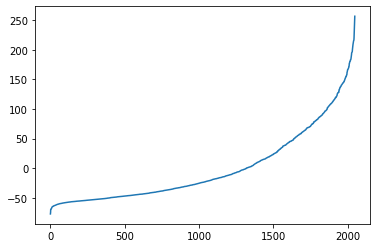

In [88]:
totalclearance=torch.zeros(model.dimensionality)
for index in range(len(model.classes)):
    classmetrics=torch.Tensor([(model.encode(xtr[ytr==index])*class_).sum(0).tolist() for class_ in model.classes])[index]
    clearance=classmetrics-classmetrics.mean(0).tolist()
    totalclearance+=clearance
order = torch.argsort(totalclearance)
plt.plot(range(len(order)),totalclearance[order])
plt.show()
# for classmetric in classmetrics:

In [ ]:
#SVM
# check https://scikit-learn.org/stable/modules/svm.html
#Accuracy is suspiciously low - look for ways to use different kernels such as rbf kernel
#look for ways to optimize hyperparametes, such as GridSearchCV
#Make sure to read: Section 1.4.6.1.
#Report: Methods tried and their accuracy compared with SVM.py
#Replace: The predict function in the SVM class with any function that has higher accuracy

In [ ]:
model=SVM()
start=time.time()
model.fit(transxtrain,transytrain)
end=time.time()
print(end-start)
print("inference")
start=time.time()
yhat=model(transx_test)
end=time.time()
print(end-start)

2.620640993118286
inference
2.530949115753174
